# AIVLE스쿨 2차 미니프로젝트: 신규 아파트 주차 수요 예측

<img src = "https://github.com/Jangrae/img/blob/master/parking.png?raw=true" width=800, align="left"/>

# 단계 3: 모델링

## [미션]

- 모델링을 수행합니다.
    - 전처리를 추가로 진행합니다.
    - 4개 이상의 알고리즘을 사용해 모델링을 수행합니다.
    - 각 모델에 대해 성능 튜닝을 수행합니다.
    - 성능을 비교해 최선의 모델을 선정합니다.
- 데이터 파이프라인 함수를 만듭니다.
- 새로운 데이터를 읽어와 예측을 수행합니다.

## 1. 환경설정

### (1) 로컬 수행(Anaconda)

- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [255]:
# 기본 경로
path = ''

### (2) 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [258]:
# 구글 드라이브 연결, 패스 지정
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'

### (3) 한글 폰트 표시용 라이브러리 설치

In [261]:
# 한글 표시를 위한 라이브러리 설치
!pip install koreanize_matplotlib -q

### (4) 라이브러리 불러오기

In [263]:
# 기본 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# 모델링용 라이브러리 불러오기

# 회귀
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import *


# 성능 튜닝
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# 기타 라이브러리 불러기기
import joblib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### (5) 데이터 불러오기

- joblib.dump() 함수를 사용해 base_data2.pkl 파일을 읽어옵니다.
- 읽어온 데이터를 data 데이터프레임으로 선언하고 기본 정보를 확인합니다.

In [265]:
# 파일 읽어오기
data = joblib.load(path+'base_data2.pkl')

# 확인
data.head()

,총세대수,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,면적70_80,면적80_200,임대보증금,임대료
0,78,2013,계단식,개별,1,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,35,2013,복도식,개별,1,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,88,2013,계단식,개별,1,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,477,2014,복도식,지역,1,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,15,2013,복도식,개별,1,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333


In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   총세대수      345 non-null    int64  
 1   준공연도      345 non-null    int64  
 2   건물형태      345 non-null    object 
 3   난방방식      345 non-null    object 
 4   승강기설치여부   345 non-null    int64  
 5   실차량수      345 non-null    int64  
 6   총면적       345 non-null    float64
 7   면적10_30   345 non-null    int64  
 8   면적30_40   345 non-null    int64  
 9   면적40_50   345 non-null    int64  
 10  면적50_60   345 non-null    int64  
 11  면적60_70   345 non-null    int64  
 12  면적70_80   345 non-null    int64  
 13  면적80_200  345 non-null    int64  
 14  임대보증금     345 non-null    float64
 15  임대료       345 non-null    float64
dtypes: float64(3), int64(11), object(2)
memory usage: 43.3+ KB


In [267]:
data.describe()

,총세대수,준공연도,승강기설치여부,실차량수,총면적,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,면적70_80,면적80_200,임대보증금,임대료
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,3.450000e+02,345.000000
mean,546.759420,2007.713043,0.965217,555.431884,37282.661962,45.837681,169.513043,147.455072,132.889855,1.852174,16.895652,34.515942,2.382737e+07,197729.050210
std,432.359538,7.261036,0.183495,374.640474,29588.197927,161.133746,222.935074,216.675593,252.947082,32.771294,76.441995,116.975949,2.247481e+07,158760.777669
min,1.000000,1992.000000,0.000000,21.000000,68.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,178.000000,2003.000000,1.000000,258.000000,11293.832100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.272491e+07,112905.000000
50%,491.000000,2008.000000,1.000000,498.000000,32190.360000,0.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.930850e+07,172000.000000
75%,853.000000,2013.000000,1.000000,822.000000,56189.979600,0.000000,298.000000,264.000000,150.000000,0.000000,0.000000,0.000000,2.837700e+07,227564.000000
max,2289.000000,2022.000000,1.000000,1657.000000,150126.863200,1181.000000,1429.000000,1258.000000,1444.000000,608.000000,756.000000,850.000000,1.898219e+08,950305.000000


In [268]:
data.corr(numeric_only=True)

,총세대수,준공연도,승강기설치여부,실차량수,총면적,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,면적70_80,면적80_200,임대보증금,임대료
총세대수,1.000000,0.085396,0.129458,0.712475,0.927286,0.373339,0.597253,0.590412,0.387626,0.056001,0.092164,0.021211,0.172154,0.203985
준공연도,0.085396,1.000000,0.212851,0.287266,0.171747,0.120319,-0.161153,-0.058694,0.079040,0.066059,0.248191,0.229966,0.331838,0.325513
승강기설치여부,0.129458,0.212851,1.000000,0.187295,0.152063,0.049852,-0.027774,0.118407,0.074197,0.010745,0.042019,0.056095,0.103886,0.118845
실차량수,0.712475,0.287266,0.187295,1.000000,0.822183,0.077284,0.211618,0.392296,0.381746,0.151615,0.339168,0.340284,0.361867,0.337066
총면적,0.927286,0.171747,0.152063,0.822183,1.000000,0.174025,0.409823,0.487128,0.457999,0.102296,0.327435,0.304440,0.361495,0.368626
면적10_30,0.373339,0.120319,0.049852,0.077284,0.174025,1.000000,0.161440,0.047927,-0.124520,-0.016124,-0.063058,-0.084182,-0.087044,-0.062674
면적30_40,0.597253,-0.161153,-0.027774,0.211618,0.409823,0.161440,1.000000,0.376689,-0.132525,-0.043100,-0.168550,-0.225013,-0.121694,-0.086248
면적40_50,0.590412,-0.058694,0.118407,0.392296,0.487128,0.047927,0.376689,1.000000,-0.073910,-0.038574,-0.150853,-0.201384,-0.068919,-0.067401
면적50_60,0.387626,0.079040,0.074197,0.381746,0.457999,-0.124520,-0.132525,-0.073910,1.000000,-0.029779,-0.078286,-0.125007,0.141206,0.164231
면적60_70,0.056001,0.066059,0.010745,0.151615,0.102296,-0.016124,-0.043100,-0.038574,-0.029779,1.000000,0.265453,-0.016725,0.032534,0.114207


### (6) 함수 생성

- 실젯값과 모델이 예측한 값을 시각화해 비교할 함수를 만듭니다.

In [23]:
# # 실젯값, 예측값 비교 함수 만들기
# def model_plot(y_test, y_pred):
#     plt.figure(figsize=(10, 3))
#     plt.plot(y_test.values, label='Actual', linewidth=0.7, marker='o', markersize=2)
#     plt.plot(y_pred, label='Predicted', linewidth=0.7, marker='o', markersize=2)
#     plt.legend()
#     plt.show()

## 2. 모델링

- 모델링을 위한 결측치 처리, 데이터 분할, 스케일링, 가변수화 등을 수행합니다.
- 4개 이상의 알고리즘을 사용하여 모델을 만듭니다.
- 모델 이름은 서로 다르게 합니다. (예: model1, model2...)
- Linear Regression 이외의 알고리즘을 사용한 모델은 GridSearchCV() 함수로 성능 최적화를 수행합니다.
- 적절한 평가지표로 모델의 성능을 평가합니다.
- 실젯값과 예측값을 시각화해 비교합니다.
- 성능 비교를 통해 최선의 모델을 선정합니다.

### (1) 데이터 전처리

- 필요한 전처리를 수행합니다.

#### 1) 가변수화

- '건물형태', '난방방식' 변수에 대해 가변수화를 수행합니다.

In [275]:
data = pd.get_dummies(data, columns=['건물형태', '난방방식'], drop_first=True, dtype=int)
data

,총세대수,준공연도,승강기설치여부,실차량수,총면적,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,면적70_80,면적80_200,임대보증금,임대료,건물형태_복도식,건물형태_혼합식,난방방식_중앙,난방방식_지역
0,78,2013,1,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000,0,0,0,0
1,35,2013,1,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000,1,0,0,0
2,88,2013,1,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000,0,0,0,0
3,477,2014,1,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000,1,0,0,1
4,15,2013,1,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,1485,1993,1,298,64622.2500,1181,298,0,6,0,0,0,7.595571e+06,104975.714286,1,0,1,0
341,1386,1993,1,258,57616.8100,1071,298,0,17,0,0,0,8.092875e+06,111848.750000,1,0,1,0
342,956,1994,1,243,37398.7200,956,0,0,0,0,0,0,9.931000e+06,134540.000000,1,0,0,1
343,120,2020,1,47,5581.8024,66,54,0,0,0,0,0,2.515500e+06,50040.000000,1,0,0,0


In [125]:
# 파일 읽어오기
new_data = pd.read_excel(path+'train.xlsx')
data = data_pipeline(new_data)
data

,총세대수,준공연도,실차량수,총면적,임대보증금,임대료,난방방식_중앙,난방방식_지역
0,78,2013,109,6023.7683,5.696200e+07,642930.000000,0,0
1,35,2013,35,1569.1668,6.306200e+07,470100.000000,0,0
2,88,2013,88,7180.1396,7.219000e+07,586540.000000,0,0
3,477,2014,943,47058.9273,1.015167e+08,950305.000000,0,1
4,15,2013,21,543.0268,5.522750e+07,340148.333333,0,0
...,...,...,...,...,...,...,...,...
299,1485,1993,298,64622.2500,7.595571e+06,104975.714286,1,0
300,1386,1993,258,57616.8100,8.092875e+06,111848.750000,1,0
301,956,1994,243,37398.7200,9.931000e+06,134540.000000,0,1
302,120,2020,47,5581.8024,2.515500e+06,50040.000000,0,0


In [127]:
# data = data[['총면적','실차량수','단지내주차면수', '총세대수', '면적50_60','면적70_80','면적80_200', '준공연도']]
# data

#### 2) x, y 분리

- Target를 지정하고, x와 y로 분리합니다.

In [277]:
target = '실차량수'

x = data.drop(columns = target)
y = data.loc[:,target]

#### 3) 학습용, 평가용 분리

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.

In [280]:
# 데이터 분리 
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.3)

#### 4) 스케일링

- 필요한 경우 스케일링을 진행합니다.
- 예를 들어 KNN 알고리즘을 사용할 경우입니다.

In [283]:
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

In [285]:
MAE = {}
RMSE = {}
MAPE = {}
R2 = {}

### (2) 모델 1: DecisionTreeRegressor

In [288]:
# 파라미터 선언
param = {'max_depth': range(1, 31)}
model1 = GridSearchCV(DecisionTreeRegressor(),param,cv=5)

# 학습하기
model1.fit(x_train, y_train)

# 예측하기
y_val_pred = model1.predict(x_val)

#최적 파라미터, 최고 성능 확인
print('최적 파라미터',model1.best_params_)
print('최고 성능', model1.best_score_)

# 평가하기
print('MAE:', mean_absolute_error(y_val, y_val_pred))
print('R2:', r2_score(y_val, y_val_pred))

최적 파라미터 {'max_depth': 4}
최고 성능 0.649771863695893
MAE: 158.98238554173986
R2: 0.6960824867392577


In [289]:
MAE['DT'] = mean_absolute_error(y_val, y_val_pred)
RMSE['DT'] = mean_squared_error(y_val,y_val_pred)
MAPE['DT'] = mean_absolute_percentage_error(y_val,y_val_pred)
R2['DT'] = r2_score(y_val, y_val_pred)

### (3) 모델 2: LinearRegression


In [291]:
# 모델링
model2 = LinearRegression()

# 학습하기
model2.fit(x_train, y_train)

# 예측하기
y_val_pred = model2.predict(x_val)

# 평가하기
print('MAE:', mean_absolute_error(y_val, y_val_pred))
print('R2:', r2_score(y_val, y_val_pred))

MAE: 143.3367907006031
R2: 0.7457706682976353


In [292]:
MAE['Linear'] = mean_absolute_error(y_val, y_val_pred)
RMSE['Linear'] = mean_squared_error(y_val,y_val_pred)
MAPE['Linear'] = mean_absolute_percentage_error(y_val,y_val_pred)
R2['Linear'] = r2_score(y_val, y_val_pred)

### (4) 모델 3: KNeighborsRegressor

In [296]:
# 파라미터 선언
param = {'n_neighbors': range(1, 31)}
model3 = GridSearchCV(KNeighborsRegressor(),param,cv=5)

# 학습하기
model3.fit(x_train_s, y_train)

# 예측하기
y_val_pred = model3.predict(x_val_s)

#최적 파라미터, 최고 성능 확인
print('최적 파라미터',model3.best_params_)
print('최고 성능', model3.best_score_)

# 평가하기
print('MAE:', mean_absolute_error(y_val, y_val_pred))
print('R2:', r2_score(y_val, y_val_pred))

최적 파라미터 {'n_neighbors': 5}
최고 성능 0.6178855221013192
MAE: 155.42884615384617
R2: 0.6874499320452674


In [299]:
MAE['KNN'] = mean_absolute_error(y_val, y_val_pred)
RMSE['KNN'] = mean_squared_error(y_val,y_val_pred)
MAPE['KNN'] = mean_absolute_percentage_error(y_val,y_val_pred)
R2['KNN'] = r2_score(y_val, y_val_pred)

### (5) 모델 4: RandomForestRegressor

In [301]:
# 파라미터 선언
param = {'max_depth': range(1, 31)}
model4 = GridSearchCV(RandomForestRegressor(),param,cv=5)

# 학습하기
model4.fit(x_train, y_train)

# 예측하기
y_val_pred = model4.predict(x_val)

#최적 파라미터, 최고 성능 확인
print('최적 파라미터',model4.best_params_)
print('최고 성능', model4.best_score_)

# 평가하기
print('MAE:', mean_absolute_error(y_val, y_val_pred))
print('R2:', r2_score(y_val, y_val_pred))

최적 파라미터 {'max_depth': 5}
최고 성능 0.7434189601537293
MAE: 135.97466514959672
R2: 0.7471249978704599


In [302]:
MAE['RF'] = mean_absolute_error(y_val, y_val_pred)
RMSE['RF'] = mean_squared_error(y_val,y_val_pred)
MAPE['RF'] = mean_absolute_percentage_error(y_val,y_val_pred)
R2['RF'] = r2_score(y_val, y_val_pred)

### (6) 모델 5: XGBRegressor

In [68]:
# 파라미터 선언
param = {'max_depth': range(1, 21)}
model5 = GridSearchCV(XGBRegressor(),param,cv=5)

# 학습하기
model5.fit(x_train, y_train)

# 예측하기
y_val_pred = model5.predict(x_val)

#최적 파라미터, 최고 성능 확인
print('최적 파라미터',model5.best_params_)
print('최고 성능', model5.best_score_)

# 평가하기
print('MAE:', mean_absolute_error(y_val, y_val_pred))
print('R2:', r2_score(y_val, y_val_pred))

In [51]:
MAE['XGB'] = mean_absolute_error(y_val, y_val_pred)
RMSE['XGB'] = mean_squared_error(y_val,y_val_pred)
MAPE['XGB'] = mean_absolute_percentage_error(y_val,y_val_pred)
R2['XGB'] = r2_score(y_val, y_val_pred)

### (7) 모델 6: LGBMRegressor

In [158]:
# 파라미터 선언
param = {'max_depth': range(1, 30)}
model6 = GridSearchCV(LGBMRegressor(verbose=-1),param,cv=5)

# 학습하기
model6.fit(x_train, y_train)

# 예측하기
y_val_pred = model6.predict(x_val)

#최적 파라미터, 최고 성능 확인
print('최적 파라미터',model6.best_params_)
print('최고 성능', model6.best_score_)

# 평가하기
print('MAE:', mean_absolute_error(y_val, y_val_pred))
print('R2:', r2_score(y_val, y_val_pred))

최적 파라미터 {'max_depth': 6}
최고 성능 0.7394932029013821
MAE: 111.38508144006455
R2: 0.8576176552301643


In [159]:
MAE['LGBM'] = mean_absolute_error(y_val, y_val_pred)
RMSE['LGBM'] = mean_squared_error(y_val,y_val_pred)
MAPE['LGBM'] = mean_absolute_percentage_error(y_val,y_val_pred)
R2['LGBM'] = r2_score(y_val, y_val_pred)

### (8) 성능 비교

- 각 모델의 성능을 비교합니다.

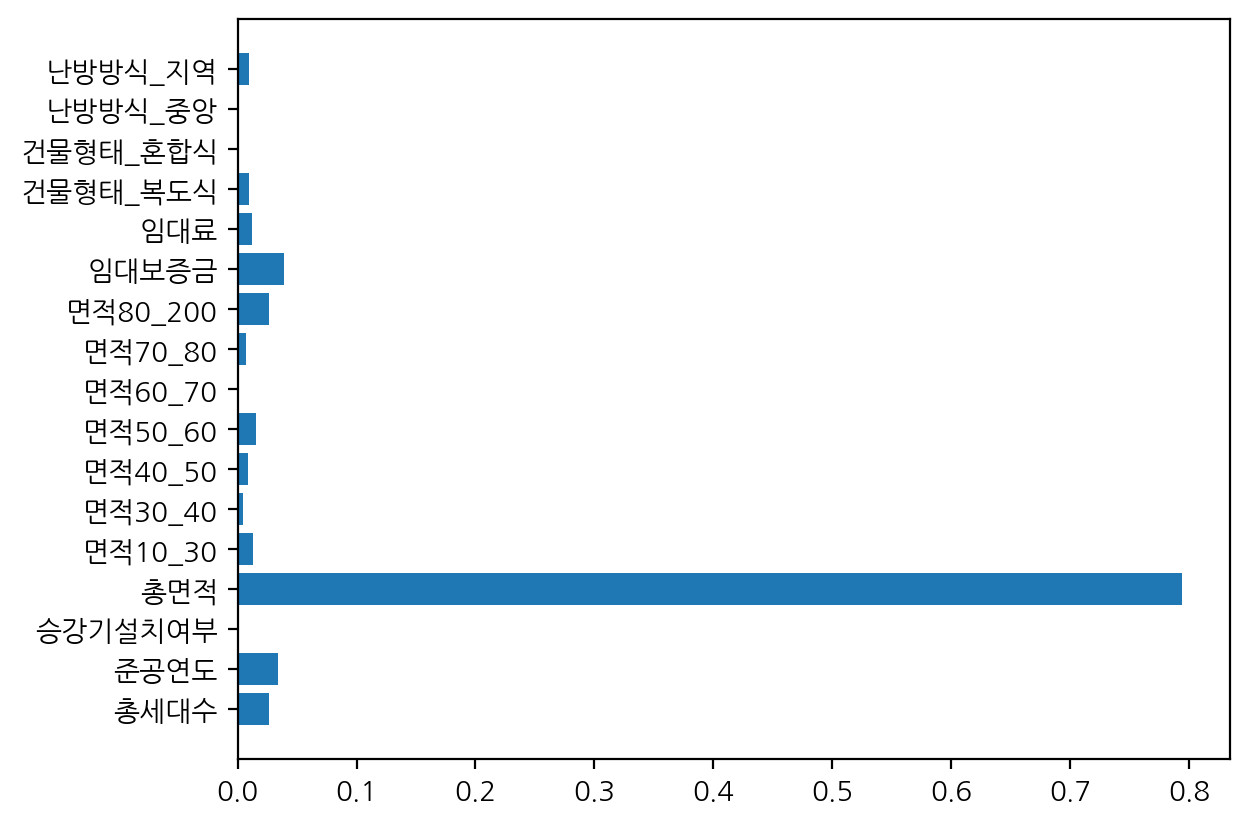

In [304]:
# 변수 중요도 시각화
plt.barh(y=list(x), width=model4.best_estimator_.feature_importances_)
plt.show()

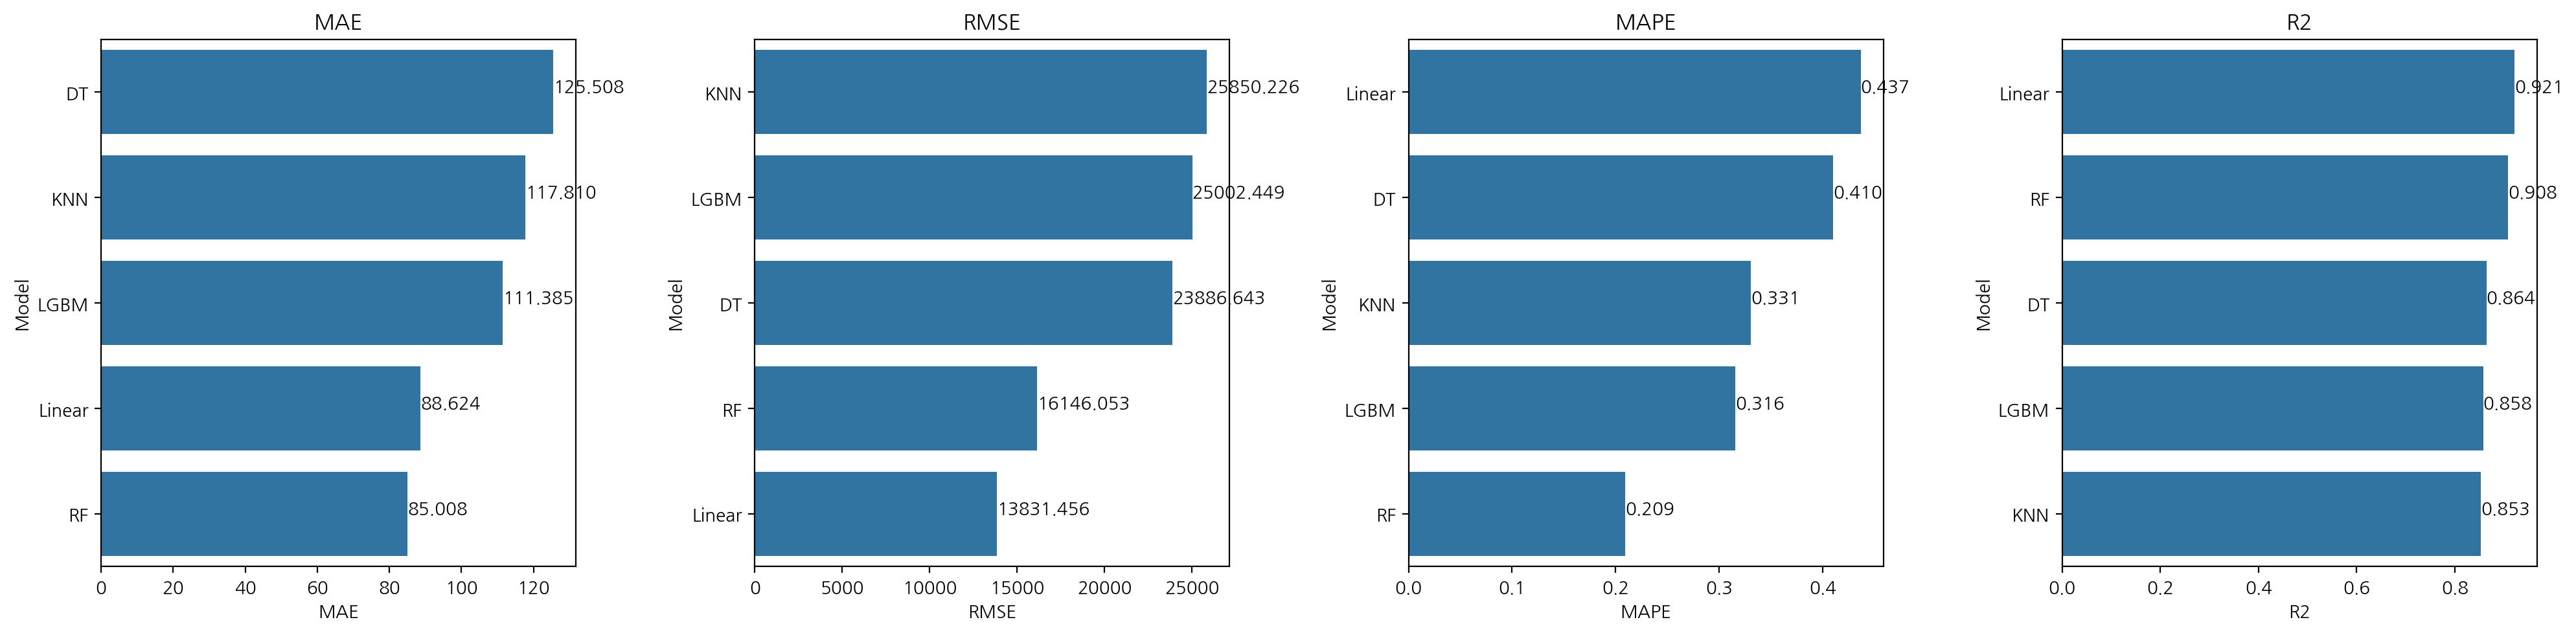

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

# 서브플롯 생성 (1행 4열)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# 데이터프레임으로 변환 (예시)
df_MAE = pd.DataFrame(list(MAE.items()), columns=['Model', 'MAE']).sort_values(by='MAE', ascending=False)
df_RMSE = pd.DataFrame(list(RMSE.items()), columns=['Model', 'RMSE']).sort_values(by='RMSE', ascending=False)
df_MAPE = pd.DataFrame(list(MAPE.items()), columns=['Model', 'MAPE']).sort_values(by='MAPE', ascending=False)
df_R2 = pd.DataFrame(list(R2.items()), columns=['Model', 'R2']).sort_values(by='R2', ascending=False)

# MAE
sns.barplot(x='MAE', y='Model', data=df_MAE, ax=axes[0])
axes[0].set_title('MAE')
for index, value in enumerate(df_MAE['MAE']):
    axes[0].text(value, index, f'{value:.3f}')

# RMSE
sns.barplot(x='RMSE', y='Model', data=df_RMSE, ax=axes[1])
axes[1].set_title('RMSE')
for index, value in enumerate(df_RMSE['RMSE']):
    axes[1].text(value, index, f'{value:.3f}')

# MAPE
sns.barplot(x='MAPE', y='Model', data=df_MAPE, ax=axes[2])
axes[2].set_title('MAPE')
for index, value in enumerate(df_MAPE['MAPE']):
    axes[2].text(value, index, f'{value:.3f}')

# R2
sns.barplot(x='R2', y='Model', data=df_R2, ax=axes[3])
axes[3].set_title('R2')
for index, value in enumerate(df_R2['R2']):
    axes[3].text(value, index, f'{value:.3f}')

plt.tight_layout()
plt.show()


## 3. 파이프라인 구축

- 새로운 데이터를 불러오고, 이 데이터를 처리할 파이프라인 함수를 만듭니다.

### (1) New Data 불러오기

- test.xlsx 파일을 읽어와 new_data 데이터프레임으로 선언합니다.
- 해당 데이터는 '실차량수' 변수가 없는 것 외에는, 최초 데이터와 동일한 구조입니다.
- 이 데이터를 대상으로 전처리와 예측을 수행합니다.

In [234]:
# 파일 읽어오기
new_data = pd.read_excel(path+'test.xlsx')

# 확인
new_data.tail()

,단지코드,단지명,총세대수,전용면적별세대수,지역,준공일자,건물형태,난방방식,승강기설치여부,단지내주차면수,전용면적,공용면적,임대보증금,임대료
99,C0353,대전판암3,768,90,대전충남,19910805,복도식,중앙난방,전체동 설치,142,40.32,16.5100,8848000,122290
100,C0360,하남미사 A26BL,588,98,서울,20160901,NaN,지역난방,NaN,539,51.37,21.5569,183228000,0
101,C0360,하남미사 A26BL,588,186,서울,20160901,NaN,지역난방,NaN,539,51.39,21.5652,183228000,0
102,C0360,하남미사 A26BL,588,102,서울,20160901,NaN,지역난방,NaN,539,59.76,25.0776,215057000,0
103,C0360,하남미사 A26BL,588,202,서울,20160901,NaN,지역난방,NaN,539,59.80,25.0944,215057000,0


### (2) 데이터 파이프라인 구축

- 데이터 파이프라인 함수를 만듭니다.
- 학습 데이터에 대해 진행했던 모든 전처리 과정을 평가 데이터에도 일괄 진행해야 합니다.
    - 입력: new_data
    - 출력: 전처리가 완료된 예측 직전 데이터프레임
- 새로운 데이터에는 '실차량수' 변수가 없음을 유의합니다.
- 참고: 다음 내용들이 처리되어야 합니다.
    - 결측치 처리
    - 변수 추가
    - 불필요한 변수 제거
    - 단지 데이터, 상세 데이터 분리
    - 단지코드별 총면적 합 집계
    - 전용면적 구간별 집계 (피벗 형태)
    - 임대보증금, 임대료 평균 집계
    - 집계 결과 병합
    - 난방방식: 개별, 지역, 중앙 세 가지로 묶기
    - 승강기설치여부: 0, 1 값으로 변경
    - 단지모드, 지역 변수 제거
    - 가변수화

In [237]:
# 파이프라인 만들기
def data_pipeline(data):
    apt01 = data.copy()
    
    # 결측치 처리
    nan_cols = ['건물형태', '난방방식', '승강기설치여부']
    for col in nan_cols:
        apt01[col] = apt01[col].fillna(apt01[col].mode()[0])

    # 변수 추가
    apt01['준공연도'] = apt01['준공일자']//10000
    apt01['총면적'] = (apt01['전용면적']+apt01['공용면적']) * apt01['전용면적별세대수']

    # 불필요한 변수 제거
    apt01.drop(columns= ['단지명', '준공일자'], inplace=True)
    
    # # 조건을 만족하는 인덱스 찾기
    # to_delete_index = apt01.loc[(apt01['총세대수'] <= 100) & (apt01['실차량수'] - apt01['총세대수'] * 2 > 0)].index
    
    # # 인덱스를 사용하여 해당 행 삭제
    # apt01.drop(to_delete_index, inplace=True)


    # 단지, 상세 데이터 분리
    data01 = apt01.loc[:,['단지코드', '총세대수', '지역', '준공연도', '건물형태', '난방방식', '승강기설치여부','실차량수','단지내주차면수']] # 실차량수 주의
    data01.drop_duplicates(ignore_index= True, inplace = True)
    data02 = apt01.loc[:,['단지코드', '총면적', '전용면적별세대수', '전용면적', '공용면적', '임대보증금', '임대료']]

    # 단지코드별 총면적 합 집계
    df_area = data02.groupby('단지코드')[['총면적']].sum()

    # 전용면적 구간별 집계 (피벗 형태)
    data02['전용면적구간'] = pd.cut(data02['전용면적'], bins =[10, 30, 40, 50, 60, 70, 80, np.inf], labels = ['면적10_30', '면적30_40', '면적40_50', '면적50_60', '면적60_70', '면적70_80', '면적80_200'])
    temp = data02.groupby(['단지코드','전용면적구간'])[['전용면적별세대수']].sum().reset_index()
    df_pivot = temp.pivot(index='단지코드', columns='전용면적구간', values='전용면적별세대수').reset_index()
    df_pivot.columns.name=None

    # 임대보증금, 임대료 평균 집계
    df_rent = data02.groupby(['단지코드'])[['임대보증금','임대료']].mean()

    # 집계 결과 병합
    base_data = pd.merge(df_area, df_pivot, how = 'left',on = '단지코드')
    base_data = pd.merge(base_data, df_rent, how = 'left',on = '단지코드')
    apt01 = pd.merge(data01, base_data, how = 'left', on = '단지코드')
    
    # 난방방식: 개별, 지역, 중앙 세 가지로 묶기
    apt01['난방방식'] = apt01['난방방식'].map(
        {'개별가스난방': '개별', 
        '개별유류난방': '개별', 
        '지역난방': '지역', 
        '지역가스난방': '지역', 
        '지역유류난방': '지역', 
        '중앙가스난방': '중앙', 
        '중앙난방': '중앙', 
        '중앙유류난방': '중앙'})
    
    # 승강기설치여부: 0, 1 값으로 변경
    apt01['승강기설치여부'] = apt01['승강기설치여부'].map(
        {'전체동 설치': 1, 
        '일부동 설치': 0, 
        '미설치': 0})
    
    # 단지모드, 지역 변수 제거
    apt01.drop(columns=['단지코드','지역'], inplace=True)

    # 가변수화
    apt01 = pd.get_dummies(apt01, columns=['건물형태', '난방방식'], drop_first=True, dtype=int)
    #apt01.drop(columns=['승강기설치여부','건물형태','면적10_30', '면적30_40', '면적40_50', '면적50_60', '면적60_70', '면적70_80', '면적80_200'], inplace=True)
    
    return apt01

### (3) 예측하기

- new_data를 파이프라인을 사용해 전처리한 후 가장 성능이 좋았던 모델로 예측한 결과를 확인합니다.

In [242]:
# 데이터 전처리
data = data_pipeline(new_data)

# 확인
data.head()

,총세대수,준공연도,총면적,임대보증금,임대료,난방방식_중앙,난방방식_지역
0,20,2012,766.2736,5.236067e+07,305753.333333,0,0
1,822,2018,31396.0944,3.546600e+07,445466.666667,0,1
2,112,2014,12450.4308,9.869750e+07,744450.000000,0,1
3,122,2011,13081.4772,0.000000e+00,0.000000,0,1
4,262,2011,28141.7516,0.000000e+00,0.000000,0,1


In [243]:
# 예측하기
predicted = model4.predict(data)

# 확인
print(predicted)

[  25.18        547.5         718.94        587.39        534.74
   51.31         66.          423.18        232.27        409.70428571
  302.14154762   62.67       1349.22        617.03033333  566.26
  740.57666667  620.38566667   55.66        822.78        906.11
  299.35333333  819.71        775.695       838.495       880.1
  265.56         63.84       1249.08        211.6         759.825     ]


- 아파트 기본 정보에 예측한 차량수를 붙여 마무리합니다.

In [247]:
# 데이터 셋 두개로 나누기
vars = ['단지코드', '단지명', '총세대수', '지역',]
result = new_data[vars].copy()
result = result.drop_duplicates()
result.reset_index(drop=True, inplace=True)

# 예측 결과 추가
result['예상차량수'] = predicted.round(1).astype(int)

# 확인
result

,단지코드,단지명,총세대수,지역,예상차량수
0,C0005,서울석촌 도시형주택(공임10년),20,서울,25
1,C0017,대구혁신센텀힐즈,822,대구경북,547
2,C0034,광교 호반마을 22단지 아파트,112,경기,718
3,C0046,죽미마을 휴먼시아12단지,122,경기,587
4,C0055,파주운정 한울마을 6단지,262,경기,534
5,C0072,벌교제석휴먼시아,35,광주전남,51
6,C0073,무안남악오룡마을,47,광주전남,66
7,C0084,진해 석동우림필유 아파트,152,경남,423
8,C0085,김해북부 두산위브 아파트,73,경남,232
9,C0112,운암주공6단지아파트,571,경기,409
